# Bigfoot Data Analysis Project
The following report is for EM212.  It uses data taken from the Bigfoot Field Researchers Organization.  The data includes all reports submitted to the BFRO reporting site.  The followning analysis will include frequency of reports by state, year and a brief analysis of the text reports.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from datetime import datetime
import numpy as np

bigfoot = pd.read_csv('./bfro_reports.csv')

I could not get the data to load properly from its URL because it is password-gated.  

# Frequency of reports by state:
plots number of reports by state for the top 10 states

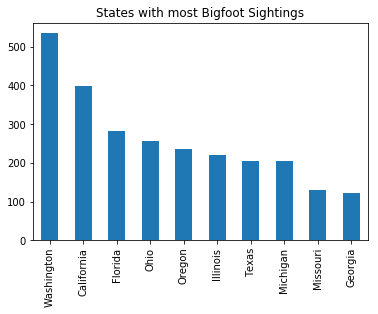

In [8]:
states = pd.DataFrame(bigfoot)
states = states.state.value_counts()
states_topten = states.head(10)
states_topten.plot(kind="bar", title="States with most Bigfoot Sightings")

## Cleaning data - removing rows with no date value:
Creates a new dataframe, df, that has removed all rows with null date values

In [11]:
df = pd.DataFrame(bigfoot)
df['date'].replace('', np.nan, inplace=True)
df.dropna(subset=['date'], inplace=True)

Creates a new column in the dataframe with the date values converted to datetime

In [12]:
df['date_parsed'] = pd.to_datetime(df['date'], format = "%Y/%m/%d")

In [14]:
counts_by_year = df['date_parsed'].dt.year.value_counts()

# Frequency of reports by year
Takes the number of reports for each year and plots frequency on a graph

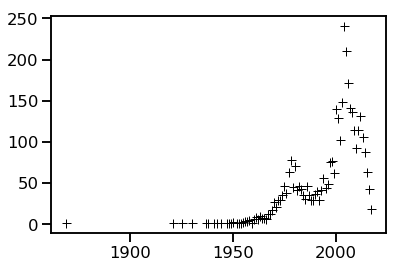

In [273]:
plt.plot(counts_by_year, "k+")

The years 2004-2006 have the highest frequency of reports.

## Text analyisis of reports
The following code parses the each individual word of all of the text reports. The most common words are shown below.

In [70]:
df['observed'].isnull().value_counts()
df['observed'].replace('', np.nan, inplace=True)
df.dropna(subset=['observed'], inplace=True)
lower_case = df['observed'].str.lower()
word_counts = lower_case.str.split(expand=True).stack().value_counts()
word_counts.head(20)

the      77445
i        46968
and      43359
a        34349
to       33723
was      32803
it       26662
of       25929
in       20719
we       17597
my       16938
that     15234
on       12002
had      10374
at       10186
were      8963
about     8889
as        8690
this      8519
but       7471
dtype: int64

This did not really yeild any interesting results, but it was a useful exercise to figure out how to parse the text.

# Discussion
First of all, I did not end up getting to merge in an additional dataset. I did not have time to think through what dataset would be good to merge, and I did not find a suitable dataset online. I wanted to do something with alcohol consumption or unemployment, but I could not find a dataset that made sense.  

## Data Cleaning
I am proud of what I accomplished in under a week in terms of cleaning my data to make it more useful for analysis.  I learned how to parse the dates.  I also learned how to parse out the text.  Considering what we have learned, it would have been impossible for me to get to all of the analysis in my project proposal, but I have learned a few useful skills that I can use to continue this work in the future.